# Create Potential SNIa List

Author: Melissa Graham

Identify potential SNIa from the "good" candidates created for all of the DDF.

To do this, use cuts in the parameter space of peak brightness vs. lightcurve duration that are based on SNIa template lightcurves.

Write the list of potential SNIa to `potential_snia_list.txt`.

Save the plot of every potential SNIa lightcurve in the folder `all_potential_snia_plots/`.

Then look at the candidates that were potential SNIa with only 2021 data, but aren't anymore as we're using all of the data.

## Set up and read in data

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

Colors to use for COSMOS-g, -r, -i and ELAIS-g, -r, -i

In [2]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

### Load the candidate lightcurves

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

### Load the lightcurve parameters data

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

### Load the polygons data

Type Ia SNe occupy a certain region in the parameter space of time span _vs._ amplitude.

MLG derived polygons in this region of parameter space separately, and we read them in now.

In [5]:
fnm = '../../extragalactic_fields/science_with_candidates/MLG_snia_menagerie_files/MLG_polygons_tspan_lcamp.dat'
poly_tspans = np.loadtxt( fnm, dtype='float', usecols=(0) )
poly_lcamps = np.loadtxt( fnm, dtype='float', usecols=(1,2,3,4,5,6), unpack=True)

## Use polygons to identify potential SNe Ia

We end up using just a single line in the amplitude _vs._ time span plane. It's the dashed line in the plots below.

> **NOTE** - **2023-03-07** - the conditions have been RELAXED to allow for a larger number of potential SNIa

For the dashed lines in the plots below.
filter slope  y-int 
g       0.050 -1.500
r       0.037 -1.125
i       0.037 -1.500
 
Number of potential sneia in COSMOS:  55
Number of potential sneia in ELAIS:  35


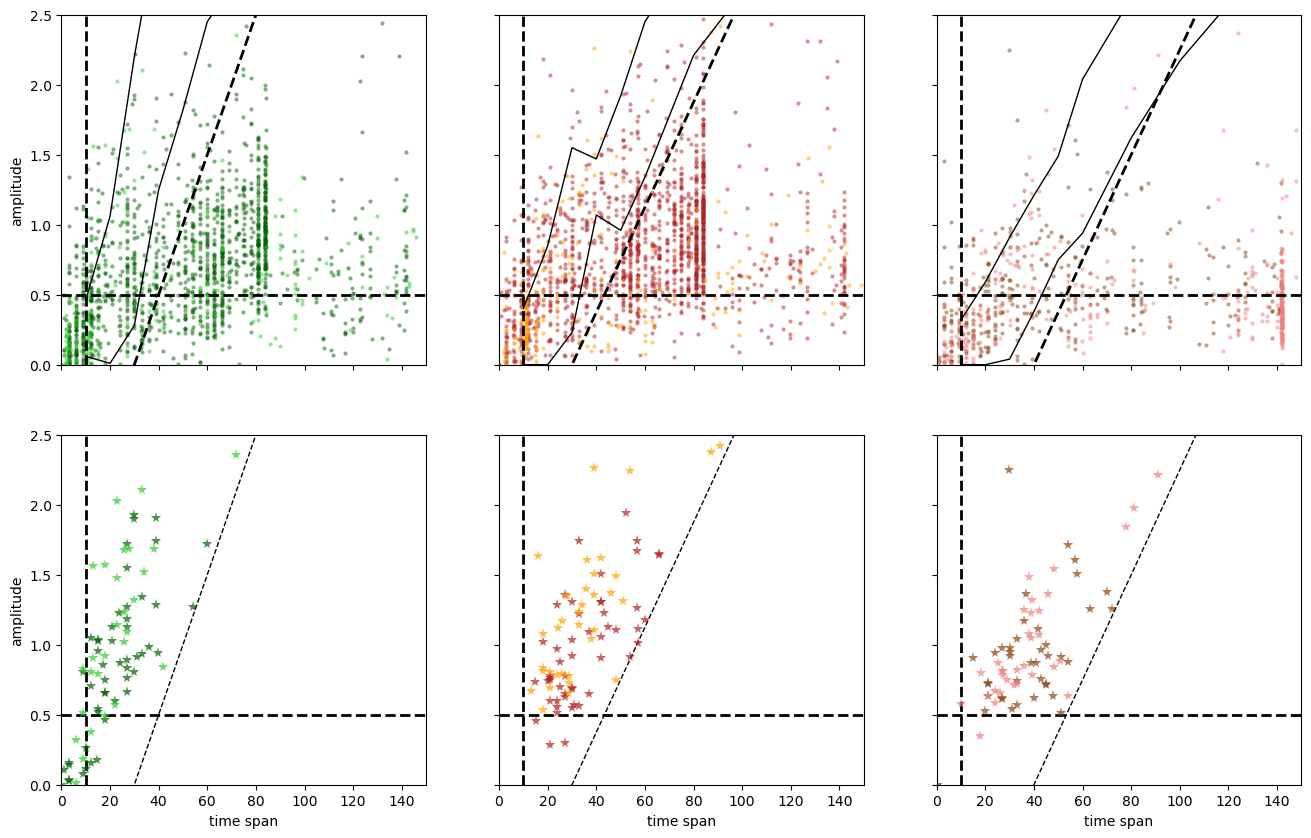

In [6]:
fig, ax = plt.subplots( 2, 3, figsize=(16,10), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where((paramLC_field == 'COSMOS') & (paramLC_tspan >= 10) & 
              (paramLC_amp >= 0.5) & (paramLC_neps >= 5))[0]
ax[0,0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[0])
ax[0,1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[1])
ax[0,2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[2])
del tx
tx = np.where((paramLC_field == 'ELAIS') & (paramLC_tspan >= 10) & 
              (paramLC_amp >= 0.5) & (paramLC_neps >= 5))[0]
ax[0,0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[3])
ax[0,1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[4])
ax[0,2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=3, mew=0, alpha=0.5, color=clr[5])
del tx

### plot the polygon ranges from template light curves
for a in range(3):
    i = a * 2
    j = (a * 2) + 1
    x = poly_tspans[:]
    y1 = poly_lcamps[i,:]
    y2 = poly_lcamps[j,:]
    ax[0,a].plot( x, y1, lw=1, color='black')
    ax[0,a].plot( x, y2, lw=1, color='black')

### define a slightly more relaxed and easier cut, and apply it 
x = poly_tspans[:]
slopes = np.asarray([2.0/40, 1.5/40, 1.5/40],dtype='float')
yints  = np.asarray([2.0-slopes[0]*70, 1.5-slopes[1]*70, 1.5-slopes[2]*80],dtype='float')
for f in range(3):
    y = slopes[f]*x + yints[f]
    ax[0,f].plot(x, y, lw=2, ls='dashed', color='black')
    ax[0,f].axvline(10, lw=2, ls='dashed', color='black')
    ax[0,f].axhline(0.5, lw=2, ls='dashed', color='black')
    ax[1,f].plot(x, y, lw=1, ls='dashed', color='black')
    ax[1,f].axvline(10, lw=2, ls='dashed', color='black')
    ax[1,f].axhline(0.5, lw=2, ls='dashed', color='black')
del x, y

print('For the dashed lines in the plots below.')
print('%-6s %-6s %-6s' % ('filter','slope','y-int'))
print('%-6s %6.3f %6.3f' % ('g',slopes[0],yints[0]))
print('%-6s %6.3f %6.3f' % ('r',slopes[1],yints[1]))
print('%-6s %6.3f %6.3f' % ('i',slopes[2],yints[2]))

### create an array for flagging potential SNIa (1 = yes)
paramLC_potSNIa = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where( (paramLC_tspan >= 10) & (paramLC_amp >= 0.5) & (paramLC_neps >= 5) )[0]
for t in tx:
    cntr = 0
    glow = slopes[0]*paramLC_tspan_g[t] + yints[0]
    rlow = slopes[1]*paramLC_tspan_r[t] + yints[1]
    ilow = slopes[2]*paramLC_tspan_i[t] + yints[2]
    if (glow <= paramLC_amp_g[t]) & (paramLC_amp_g[t] >= 0.5) & \
       (paramLC_tspan_g[t] >= 10) & (paramLC_tspan_g[t] <= 200) & \
       (paramLC_neps_g[t] >= 5):
        cntr += 1
    if (rlow <= paramLC_amp_r[t]) & (paramLC_amp_r[t] >= 0.5) & \
       (paramLC_tspan_r[t] >= 10) & (paramLC_tspan_r[t] <= 200) & \
       (paramLC_neps_r[t] >= 5):
        cntr += 1
    if (ilow <= paramLC_amp_i[t]) & (paramLC_amp_i[t] >= 0.5) & \
        (paramLC_tspan_i[t] >= 10) & (paramLC_tspan_i[t] <= 200) & \
        (paramLC_neps_i[t] >= 5):
        cntr += 1

    if (cntr == 2) | (cntr == 3):
        paramLC_potSNIa[t] = 1
    
    del glow,rlow,ilow,cntr
del tx, slopes, yints

print(' ')
### overplot the potential SNeIa
tx = np.where( (paramLC_potSNIa == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential sneia in COSMOS: ',len(tx))
ax[1,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[0] )
ax[1,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[1] )
ax[1,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[2] )
del tx
tx = np.where( (paramLC_potSNIa == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential sneia in ELAIS: ',len(tx))
ax[1,0].plot( paramLC_tspan_g[tx], paramLC_amp_g[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[3] )
ax[1,1].plot( paramLC_tspan_r[tx], paramLC_amp_r[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[4] )
ax[1,2].plot( paramLC_tspan_i[tx], paramLC_amp_i[tx], '*', ms=8, mew=0, alpha=0.7, color=clr[5] )
del tx

### finish up the plot and show it
ax[0,0].set_xlim([0,150])
ax[0,1].set_xlim([0,150])
ax[0,2].set_xlim([0,150])
ax[0,0].set_ylim([0.,2.5])
ax[0,1].set_ylim([0.,2.5])
ax[0,2].set_ylim([0.,2.5])
ax[0,0].set_ylabel('amplitude')
ax[1,0].set_ylabel('amplitude')
ax[1,0].set_xlabel('time span')
ax[1,1].set_xlabel('time span')
ax[1,2].set_xlabel('time span')
plt.show()

### Write the list of potential SNIa to file

In [7]:
fout = open('potential_snia_list.dat', 'w')
tx = np.where(paramLC_potSNIa == 1)[0]
for x in tx:
    fout.write(paramLC_candid[x]+'\n')
fout.close()
print('Number of potential SNIa: ', len(tx))
del tx

Number of potential SNIa:  90


### Plot 40 of the potential SNIa lightcurves

Do a complicated thing to set the plot x-axis min/max to DISCLUDE any "lonely epochs".

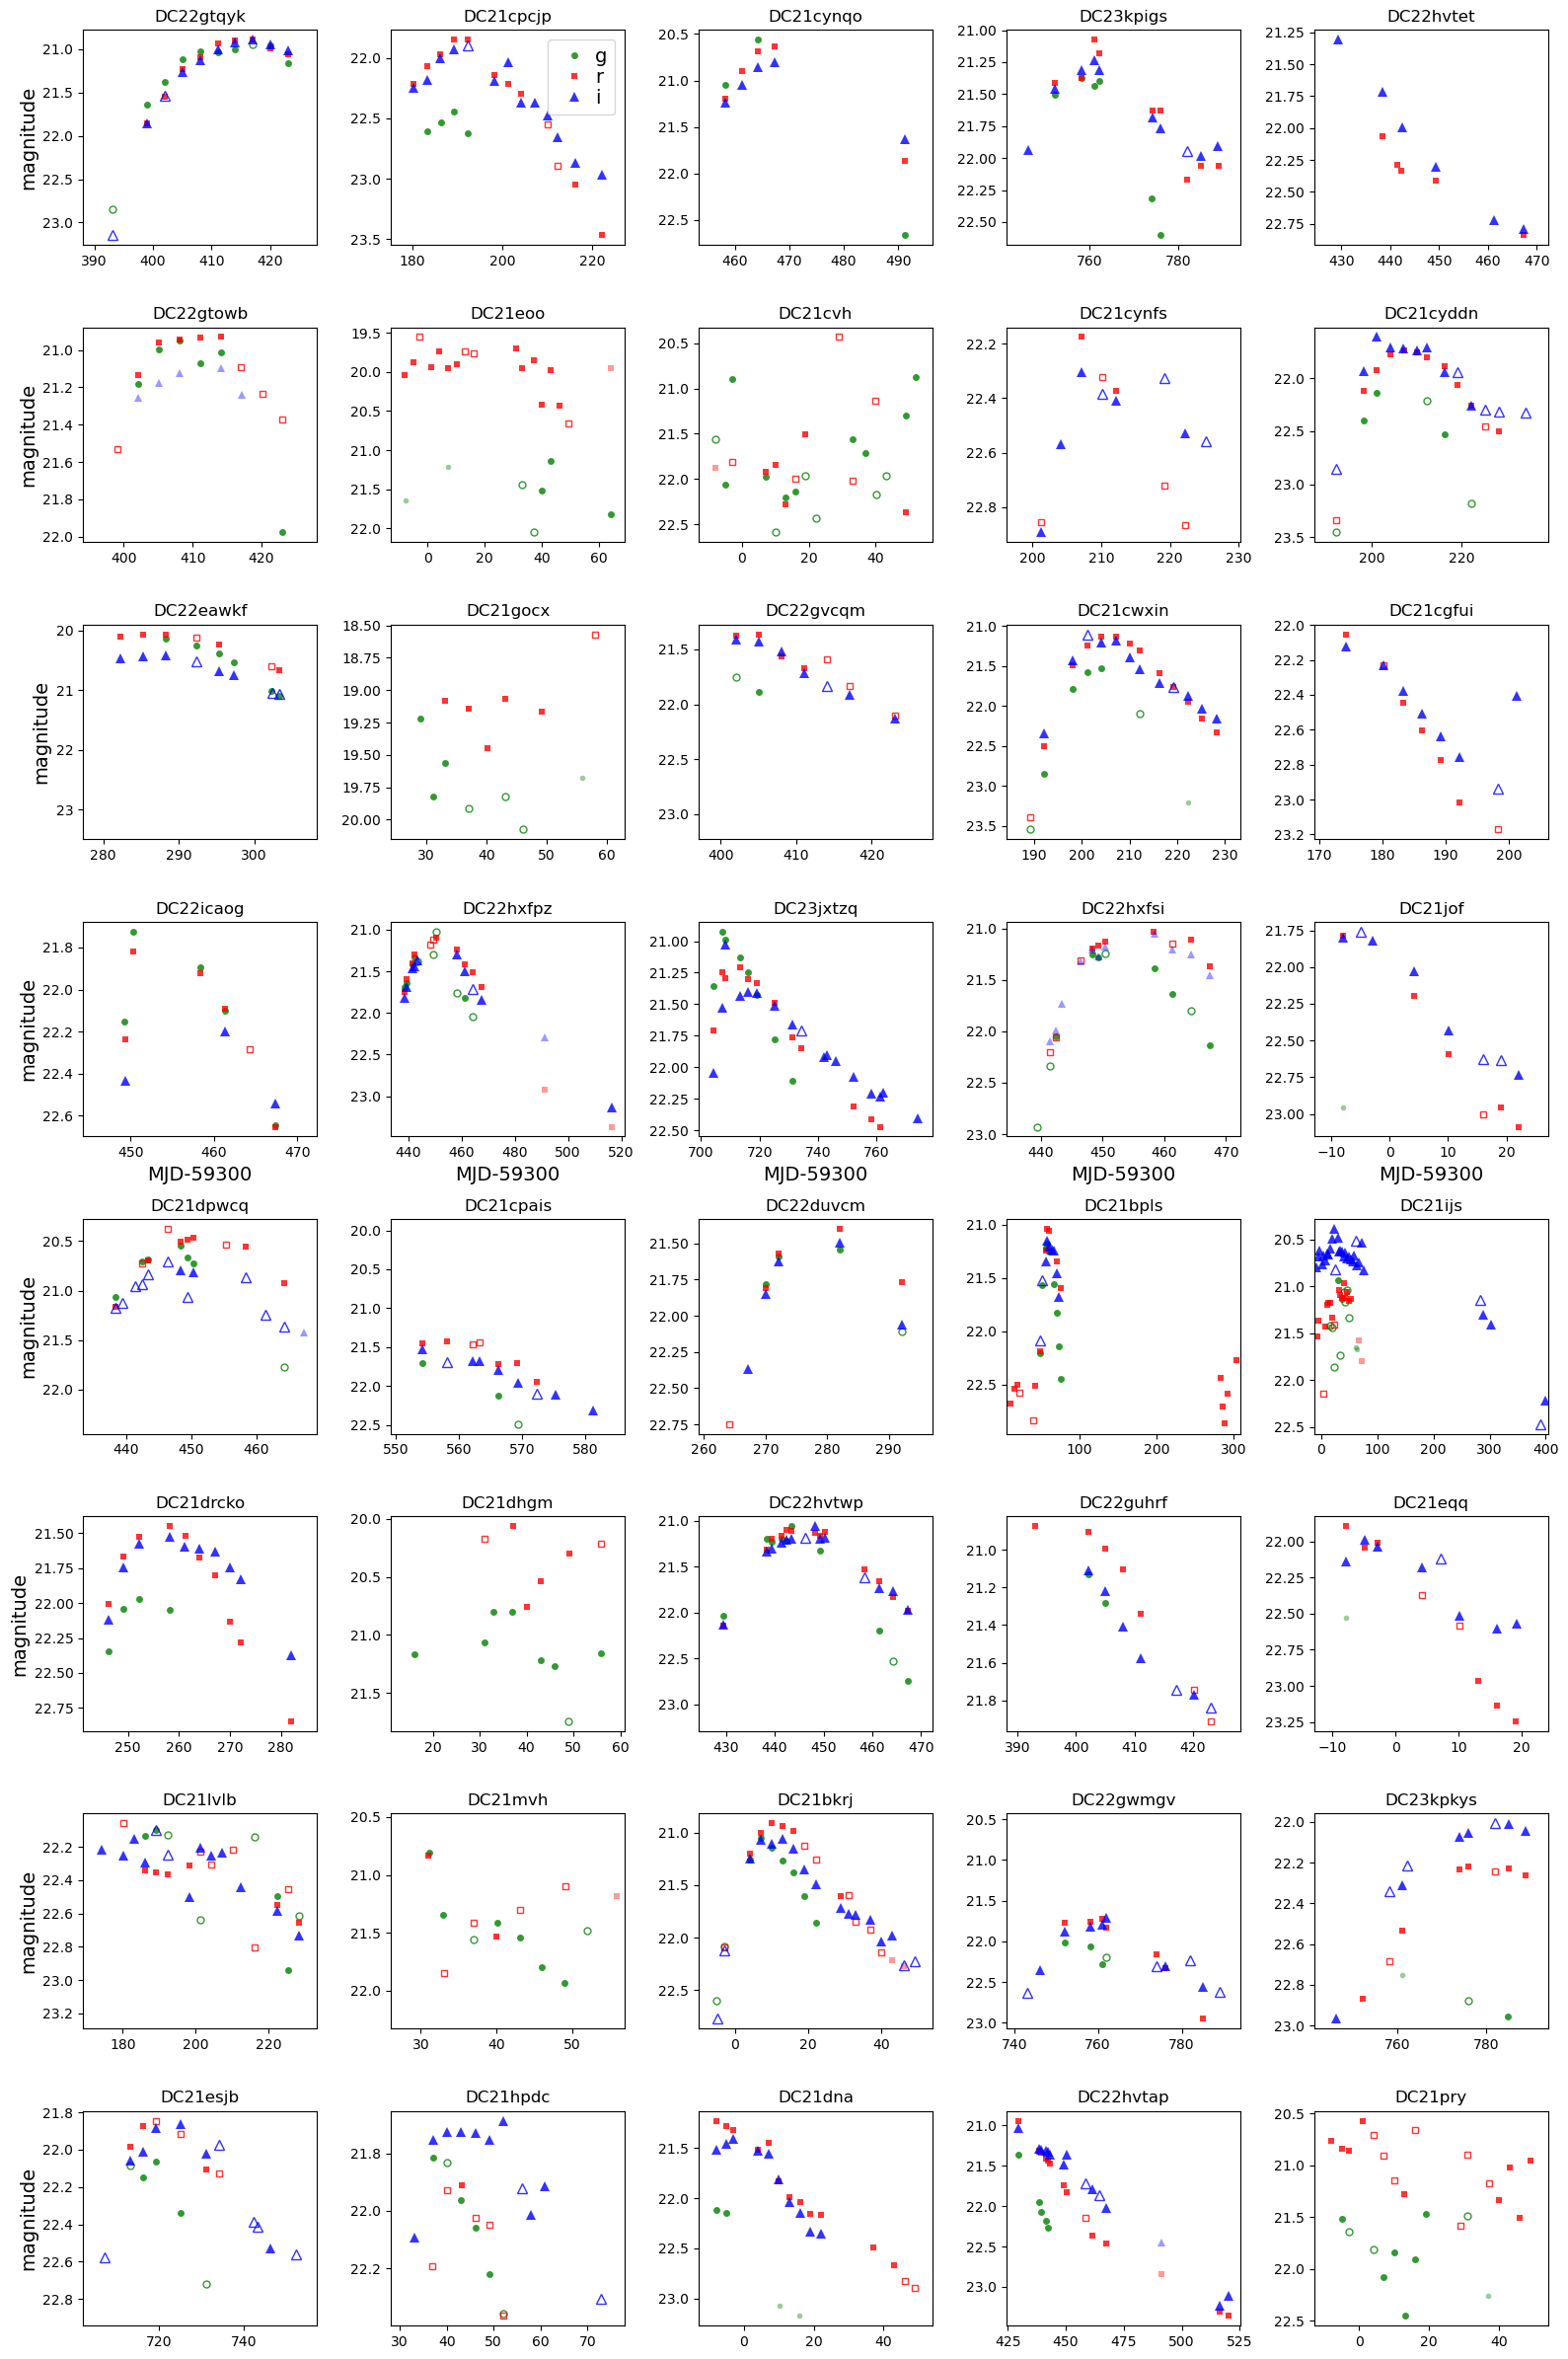

In [8]:
sx = np.where(paramLC_potSNIa == 1)[0]
np.random.shuffle(sx)

fig, ax = plt.subplots( 8, 5, figsize=(16,24), sharex=False, sharey=False )

s = 0
for i in range(8):
    ax[i, 0].set_ylabel('magnitude', fontsize=14)
    for j in range(5):
        for f,filt in enumerate(all_filters):
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            ax[i, j].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            ax[i, j].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            ax[i, j].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                         all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            del cx0, cx1, cx2
            
        cx = np.where((candLC_candid == paramLC_candid[sx[s]]) & (candLC_lef != 1))[0]
        xmin = np.min(candLC_mjd[cx])
        xmax = np.max(candLC_mjd[cx])
        del cx
        ax[i, j].invert_yaxis()
        ax[i, j].set_xlim([xmin-59300.-5, xmax-59300.+5])
        del xmin, xmax
        ax[i, j].set_title(paramLC_candid[sx[s]])
        s += 1

ax[0,1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    ax[3,j].set_xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

### Save individual plots as PNG files

In [9]:
sx = np.where(paramLC_potSNIa == 1)[0]
plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))
    
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
        del cx0, cx1, cx2
    cx = np.where(candLC_candid == paramLC_candid[sx[x]])[0]
    xmin = np.min(candLC_mjd[cx])
    xmax = np.max(candLC_mjd[cx])
    del cx
    plt.gca().invert_yaxis()
    plt.title(paramLC_candid[sx[x]])
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.xlim([xmin - 59300.0 - 5.0, xmax - 59300.0 + 5.0])
    del xmin, xmax
    plt.xlabel('MJD-59300', fontsize=14)
    plt.ylabel('mag', fontsize=14)
    plt.savefig('all_potential_snia_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx

## Explore the LS DR10 cross-matches

Read in all rows of the cross-matched file.

In [10]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

For every potential SNIa, store its index in the `paramLC_potSNIa` array 
as a flag for each candidate listed in the cross-match file.

In [11]:
sx = np.where(paramLC_potSNIa == 1)[0]

lsdr10xm_mindex = np.zeros(len(lsdr10xm_candid), dtype='int')-1

for i in range(len(sx)):
    tx = np.where(lsdr10xm_candid == paramLC_candid[sx[i]])[0]
    if len(tx) == 1:
        lsdr10xm_mindex[tx[0]] = sx[i]
    del tx

del sx

Identify potential SNIa with no matches, star matches, and galaxy matches.

In [12]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
print(len(tx))

ax = np.where(lsdr10xm_flagstar[tx] == -1)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

print(' ')
print('Number of potential SN Ia that are cross-matched with:')
print('no source: ', len(ax))
print('a galaxy: ', len(bx))
print('a star: ', len(cx))

dx = np.where(lsdr10xm_flagmatch[tx[bx]] == 1)[0]
ex = np.where(lsdr10xm_flagmatch[tx[cx]] == 1)[0]

print(' ')
print('Number of potential SN Ia that are cross-matched with:')
print('a galaxy, but a star is nearby too: ', len(dx))
print(lsdr10xm_candid[tx[bx[dx]]])
print('a star, but a galaxy is nearby too: ', len(ex))
print(lsdr10xm_candid[tx[cx[ex]]])

del tx, ax, bx, cx, dx, ex

90
 
Number of potential SN Ia that are cross-matched with:
no source:  4
a galaxy:  68
a star:  18
 
Number of potential SN Ia that are cross-matched with:
a galaxy, but a star is nearby too:  9
['DC21cgfrp' 'DC21cyddn' 'DC22gtpdx' 'DC22hvtwp' 'DC22hvuhl' 'DC22isyfm'
 'DC23jjloo' 'DC23jpbgx' 'DC23kdata']
a star, but a galaxy is nearby too:  9
['DC21dhgm' 'DC21dqik' 'DC21fber' 'DC21jfcb' 'DC21kxb' 'DC21mvh' 'DC21pry'
 'DC21vfl' 'DC23kpkys']


Plot some histograms to compare the cross-matched stars and galaxies.

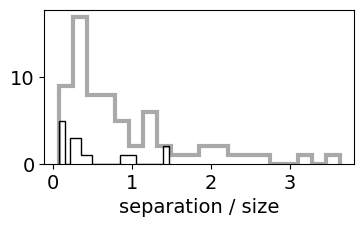

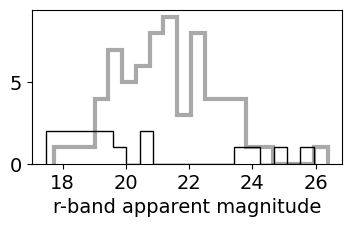

In [13]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
bx = np.where(lsdr10xm_flagstar[tx] == 0)[0]
cx = np.where(lsdr10xm_flagstar[tx] == 1)[0]

plt.figure(figsize=(4, 2))
plt.hist(lsdr10xm_sep[tx[bx]]/lsdr10xm_shaper[tx[bx]], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_sep[tx[cx]]/lsdr10xm_rpsfsize[tx[cx]], bins=20, histtype='step', color='black', lw=1, label='star')
plt.xlabel('separation / size')
plt.show()

plt.figure(figsize=(4, 2))
plt.hist(lsdr10xm_rmag[tx[bx]], bins=20, histtype='step', color='darkgrey', lw=3, label='galaxy')
plt.hist(lsdr10xm_rmag[tx[cx]], bins=20, histtype='step', color='black', lw=1, label='star')
plt.xlabel('r-band apparent magnitude')
plt.show()

del tx, bx, cx

Plot the light curves of the 18 potential SNIa that are cross-matched to stars.

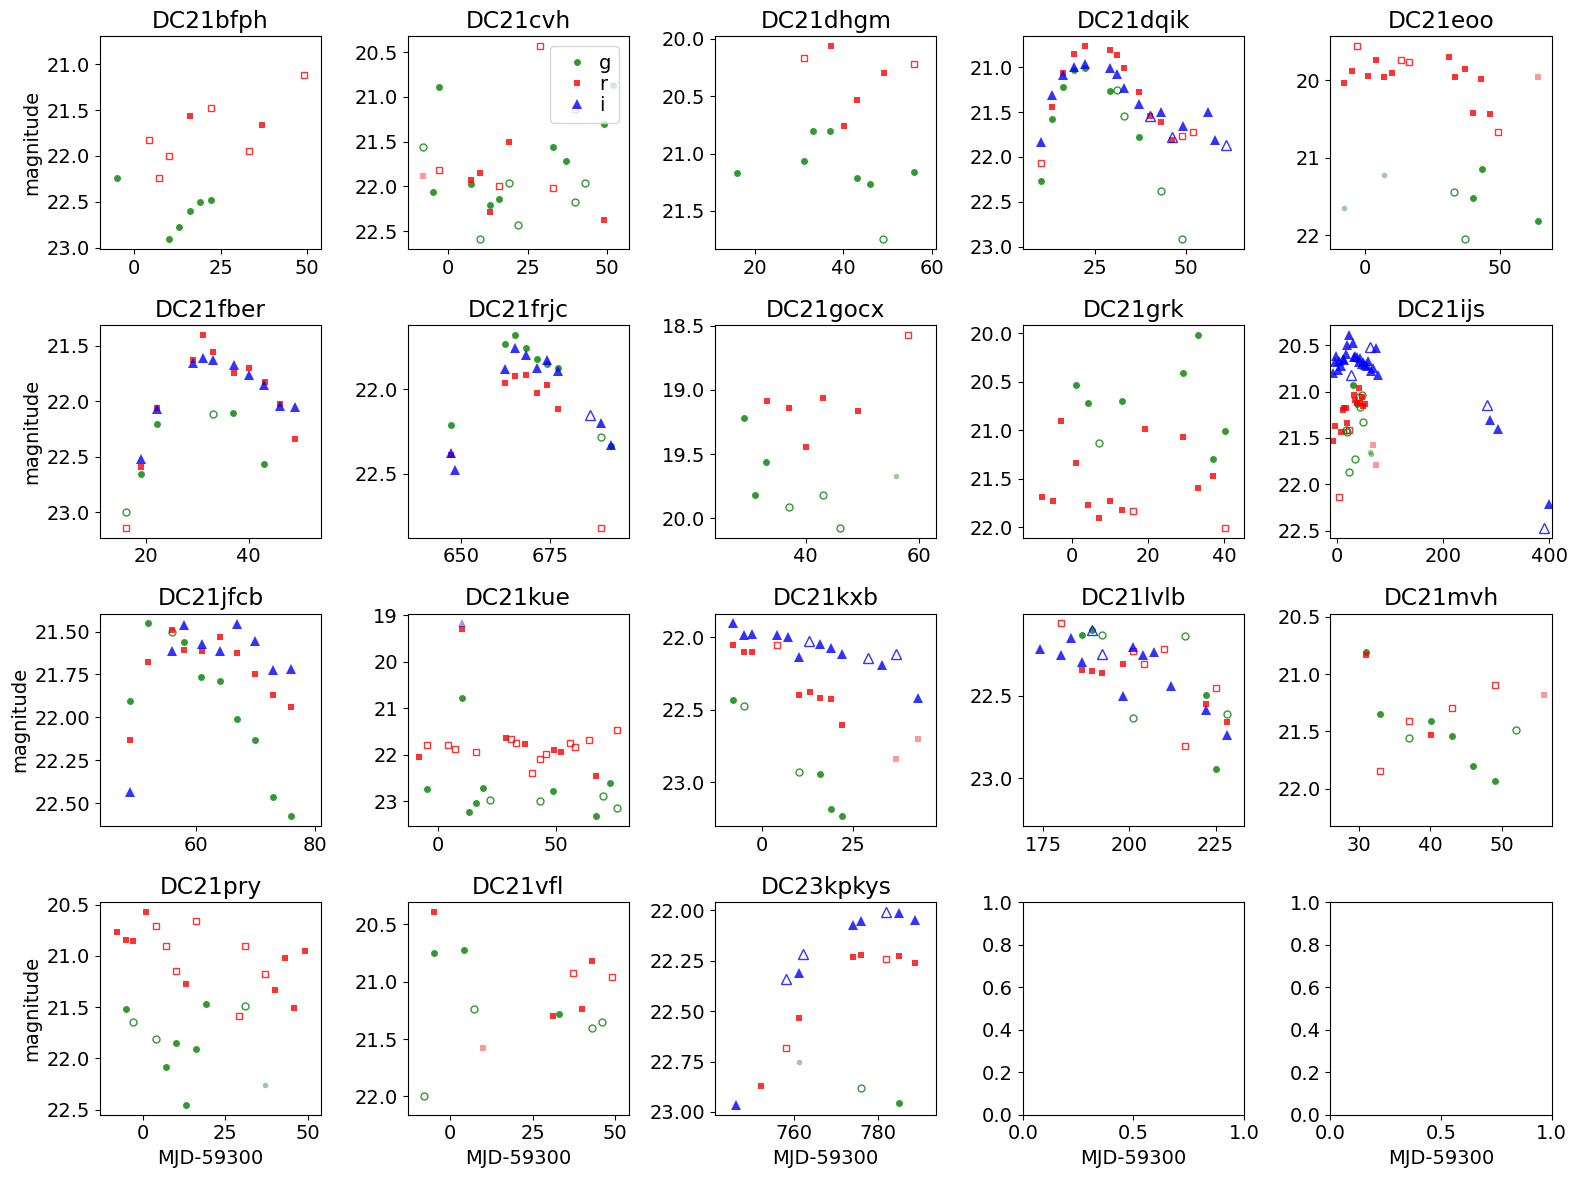

In [14]:
tx = np.where(lsdr10xm_mindex >= 0)[0]
ttx = np.where(lsdr10xm_flagstar[tx] == 1)[0]
sx = lsdr10xm_mindex[tx[ttx]]
del tx, ttx

fig, ax = plt.subplots( 4, 5, figsize=(16, 12), sharex=False, sharey=False )

s = 0
for i in range(4):
    ax[i, 0].set_ylabel('magnitude', fontsize=14)
    for j in range(5):
        if s <= 17:
            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                ax[i, j].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
                del cx0, cx1, cx2

            cx = np.where((candLC_candid == paramLC_candid[sx[s]]) & (candLC_lef == 0))[0]
            xmin = np.min(candLC_mjd[cx])
            xmax = np.max(candLC_mjd[cx])
            if paramLC_candid[sx[s]] == 'DC21frjc':
                xmin = 59940.0
            del cx
            ax[i, j].invert_yaxis()
            ax[i, j].set_xlim([xmin-59300.-5, xmax-59300.+5])
            del xmin, xmax
            ax[i, j].set_title(paramLC_candid[sx[s]])
            s += 1

ax[0,1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    ax[3,j].set_xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

These ones look transient-like:

In [15]:
templist = ['DC21dqik','DC21fber','DC21frjc','DC21jfcb']

In [16]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'

link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))

for temp in templist:
    tx = np.where(link_candid == temp)[0]
    jx = np.where(lsdr10xm_candid == temp)[0]
    print(temp, 
          lsdr10xm_flagstar[jx[0]], lsdr10xm_flagmatch[jx[0]], 
          lsdr10xm_sep[jx[0]], lsdr10xm_rpsfsize[jx[0]], lsdr10xm_rmag[jx[0]])
    print(link_lsview[tx[0]])
    print(link_rkview[tx[0]])
    del tx

del fnm

DC21dqik 1 1 0.1 1.179211 24.02
https://www.legacysurvey.org/viewer/cutout.jpg?ra=151.689426712647&dec=2.00556682067166&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21dqik
DC21fber 1 1 0.3 1.237684 24.705
https://www.legacysurvey.org/viewer/cutout.jpg?ra=149.045078531139&dec=3.17994689983373&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21fber
DC21frjc 1 0 1.2 1.26237 20.677
https://www.legacysurvey.org/viewer/cutout.jpg?ra=149.912196252803&dec=2.20007876689931&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21frjc
DC21jfcb 1 1 0.1 1.215312 25.938
https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.7729446044&dec=2.88665225035047&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21jfcb


After reviewing the matches.

 * DC21dqik - galaxy
 * DC21fber - hard to say
 * DC21frjc - star
 * DC21jfcb - nothing there

And notice that for dqik, fber, and jfcb, the match flag was 1, the star was faint. Likely mis-matches, we keep in mind.

<br>
<br>

## Compare the new list to the 2021-only list

In [17]:
fnm_2021 = '../../extragalactic_fields/science_with_candidates/MLG_snia_menagerie_files/potential_snia_list.dat'
fnm_now = 'potential_snia_list.dat'

SNIa_cand_2021 = np.loadtxt(fnm_2021, dtype='str')
SNIa_cand_now  = np.loadtxt(fnm_now, dtype='str')

In [18]:
temp = []
for cand in SNIa_cand_2021:
    tx = np.where(cand == SNIa_cand_now)[0]
    if len(tx) != 1:
        temp.append(cand)

noncands_list = np.asarray(temp, dtype='str')
del temp
print(len(noncands_list))
print(noncands_list)

16
['DC21foy' 'DC21bkup' 'DC21ebbl' 'DC21fful' 'DC21fhdp' 'DC21hsoc'
 'DC21ghrs' 'DC21ifio' 'DC21fwq' 'DC21gwj' 'DC21ewbh' 'DC21hpbk'
 'DC21fgzk' 'DC21dix' 'DC21cpbtv' 'DC21drcum']


Plot the 16 that are no longer a potential SNIa.

Do any look like they really are SNIa and shouldn't be discluded?

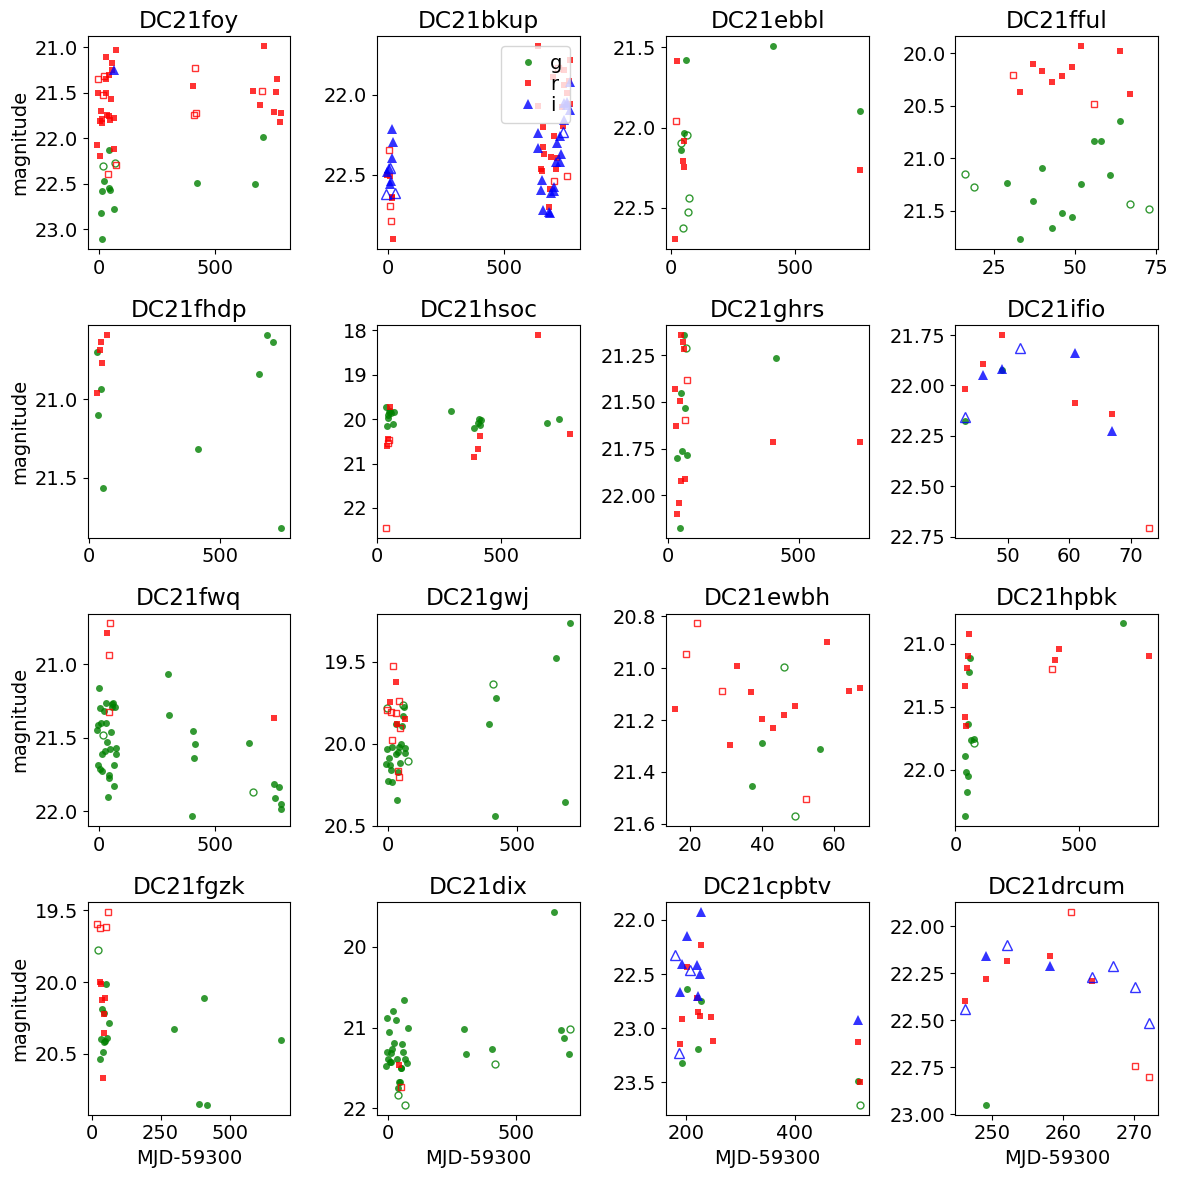

In [19]:
nx = 4
ny = 4
fig, ax = plt.subplots( ny, nx, figsize=(nx*3, ny*3), sharex=False, sharey=False )

s = 0
for i in range(ny):
    ax[i, 0].set_ylabel('magnitude', fontsize=14)
    for j in range(nx):
        for f,filt in enumerate(all_filters):
            cand = noncands_list[s]
            cx0 = np.where((candLC_candid == cand) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == cand) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            # cx2 = np.where((candLC_candid == cand) & \
            #                (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            ax[i, j].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            ax[i, j].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            # ax[i, j].plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
            #              all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            del cx0, cx1
        ax[i, j].invert_yaxis()
        ax[i, j].set_title(cand)
        s += 1
        del cand

ax[0, 1].legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(nx):
    ax[3, j].set_xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()
del s

### Investigate the two SNIa-ish rejected lightcurves

Above, of the 16 candidates that were SNIa-like in 2021 but aren't any longer,
all but two appear to have non-SNIa-like lightcurves.

The exceptions are DC21ifio and DC21drcum.

Take a look at their lightcurve summary parameters.

In [20]:
for cand in noncands_list:
    cx = np.where(cand == paramLC_candid)[0]
    # if len(cx) == 1:
    if (len(cx) == 1) & ((cand == 'DC21drcum') | (cand == 'DC21ifio')):
        print(cand)
        print('tspan   %4i %4i %4i %4i' % (paramLC_tspan[cx[0]], paramLC_tspan_g[cx[0]], 
                                           paramLC_tspan_r[cx[0]], paramLC_tspan_i[cx[0]]))
        # print('minmag  %4.1f %4.1f %4.1f %4.1f' % (paramLC_minmag[cx[0]], paramLC_minmag_g[cx[0]], 
        #                                            paramLC_minmag_r[cx[0]], paramLC_minmag_i[cx[0]]))
        print('amp     %4.2f %4.2f %4.2f %4.2f' % (paramLC_amp[cx[0]], paramLC_amp_g[cx[0]], 
                                                   paramLC_amp_r[cx[0]], paramLC_amp_i[cx[0]]))
        print('neps    %4i %4i %4i %4i' % (paramLC_neps[cx[0]], paramLC_neps_g[cx[0]], 
                                           paramLC_neps_r[cx[0]], paramLC_neps_i[cx[0]]))
        print(' ')

DC21ifio
tspan     29    6   29   23
amp     0.96 0.25 0.96 0.41
neps       7    2    6    6
 
DC21drcum
tspan     25    0   25   25
amp     1.03 0.00 0.88 0.42
neps       9    1    8    8
 


DC21ifio: i-band amplitude needed to be >0.5 to make the cut.

DC21drcum: i-band amplitude needed to be >0.5 to make the cut.

Neither were well enough sampled to yeild a good `sncosmo` fit anyway.

### Investigate two more

Also explore two other candidates that, at one point, did seem SN-like: DC22iteny and DC22jbqyi.

In [21]:
for cand in ['DC22iteny', 'DC22jbqyi']:
    cx = np.where(cand == paramLC_candid)[0]
    if len(cx) == 1:
        print(cand)
        print('tspan   %4i %4i %4i %4i' % (paramLC_tspan[cx[0]], paramLC_tspan_g[cx[0]], 
                                           paramLC_tspan_r[cx[0]], paramLC_tspan_i[cx[0]]))
        # print('minmag  %4.1f %4.1f %4.1f %4.1f' % (paramLC_minmag[cx[0]], paramLC_minmag_g[cx[0]], 
        #                                            paramLC_minmag_r[cx[0]], paramLC_minmag_i[cx[0]]))
        print('amp     %4.2f %4.2f %4.2f %4.2f' % (paramLC_amp[cx[0]], paramLC_amp_g[cx[0]], 
                                                   paramLC_amp_r[cx[0]], paramLC_amp_i[cx[0]]))
        print('neps    %4i %4i %4i %4i' % (paramLC_neps[cx[0]], paramLC_neps_g[cx[0]], 
                                           paramLC_neps_r[cx[0]], paramLC_neps_i[cx[0]]))
        print(' ')

DC22iteny
tspan    338  331   63  338
amp     2.98 2.67 0.27 2.54
neps      27   15   12   27
 
DC22jbqyi
tspan    262  247  216  261
amp     1.48 0.73 1.25 1.21
neps      17    6    8   15
 


Alright they both ended up rejected for having long timespans.

Take a look at their lightcurves.

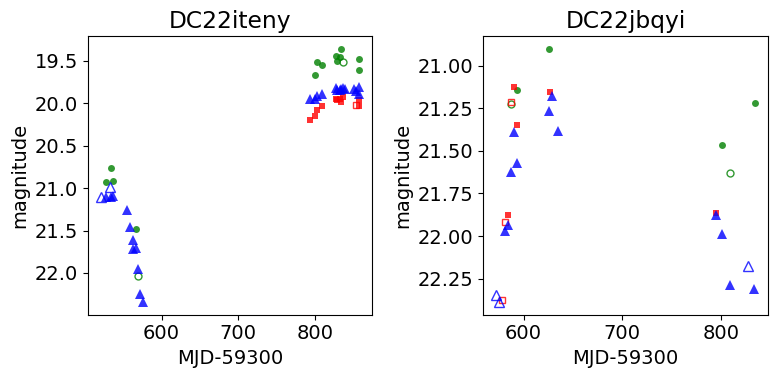

In [22]:
fig, ax = plt.subplots( 1, 2, figsize=(8, 4), sharex=False, sharey=False )

for c, cand in enumerate(['DC22iteny', 'DC22jbqyi']):
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == cand) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == cand) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        ax[c].plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                     all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        ax[c].plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                     all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
        del cx0, cx1
    ax[c].invert_yaxis()
    ax[c].set_ylabel('magnitude', fontsize=14)
    ax[c].set_xlabel('MJD-59300', fontsize=14)
    ax[c].set_title(cand)

plt.tight_layout()
plt.show()

Yup! Long lightcurves.